In [1]:
import pickle as pkl
import numpy as np

from src.models.train_emos import train_emos, train_and_test_emos
from src.visualization.pit import make_cpit_diagram_emos, make_cpit_hist_emos 
from src.visualization.brier_score import brier_skill_plot, brier_plot
from src.models.get_data import get_tensors, get_normalized_tensor
from src.models.emos import EMOS
from src.visualization.scoring_tables import make_table
from src.visualization.twcrpss_plot import make_twcrpss_plot
from src.models.emos import EMOS
from src.visualization.reliability_diagram import make_reliability_diagram
from src.training.training import load_model

2024-03-14 10:52:12.041519: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-14 10:52:12.067926: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-14 10:52:12.067951: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-14 10:52:12.068634: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-14 10:52:12.072964: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-14 10:52:12.073538: I tensorflow/core/platform/cpu_feature_guard.cc:1

In [9]:
folder = '/net/pc200239/nobackup/users/hakvoort/models/emos/'

tn_12_4 = load_model(folder + 'trunc_normal/tn_twcrps_mean12.0_std4.0.pkl')

gev_12_4 = load_model(folder + 'gev/gev_twcrps_mean12.0_std4.0.pkl')

frechet_12_4 = load_model(folder + 'frechet/frechet_twcrps_mean12.0_std4.0.pkl')

ln_12_4 = load_model(folder + 'log_normal/ln_twcrps_mean12.0_std4.0.pkl')

models = {'tn_12_4': tn_12_4, 'gev_12_4': gev_12_4, 'frechet_12_4': frechet_12_4} # , 'ln_12_4': ln_12_4}

tn_12_4 = models.pop('tn_12_4')


Using given parameters for Truncated Normal distribution
Using given parameters for Generalized Extreme Value distribution
Using given parameters for Frechet distribution
Using given parameters for Log Normal distribution


In [10]:
test_fold = 3
ignore = ['229', '285', '323']
X_test, y_test, variances_test = get_tensors(tn_12_4.neighbourhood_size, tn_12_4.feature_names, test_fold, ignore)
X_test = (X_test - tn_12_4.feature_mean) / tn_12_4.feature_std

print(X_test.shape)

(7780, 5)


In [11]:
samples = 2000

print('Base model CRPS: ', tn_12_4.loss_CRPS_sample_general(X_test, y_test, variances_test, samples).numpy())
for model, m in models.items():
    print(model, 'CRPS: ', m.loss_CRPS_sample_general(X_test, y_test, variances_test, samples).numpy())

Base model CRPS:  0.89731735
gev_12_4 CRPS:  0.9012193
frechet_12_4 CRPS:  0.90606546


There are 7780 values in the PIT diagram


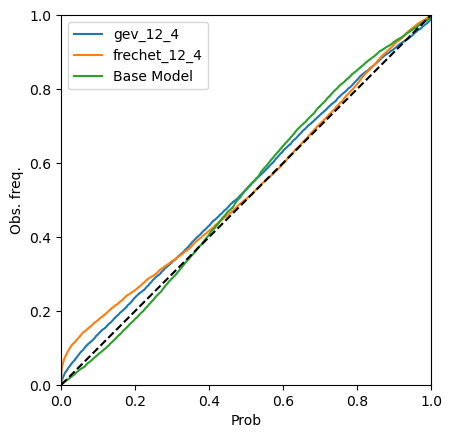

In [12]:
t = 0
make_cpit_diagram_emos(models, X_test, y_test, variances_test, t=t, base_model=tn_12_4)

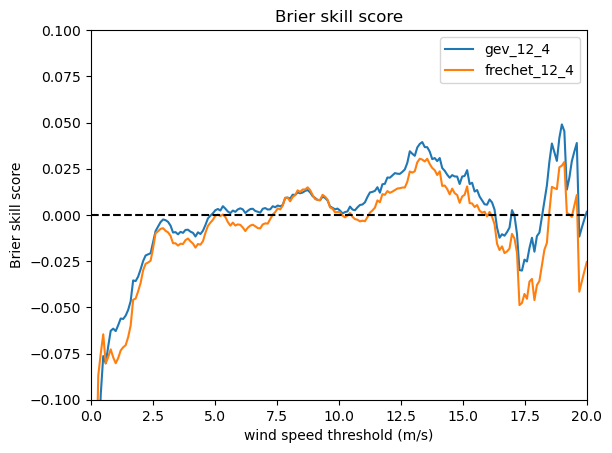

In [13]:
x_values = np.linspace(0, 20, 200)
ylim=[-0.1,0.1]
brier_skill_plot(tn_12_4, models, X_test, y_test, variances_test, x_values, ylim=ylim)

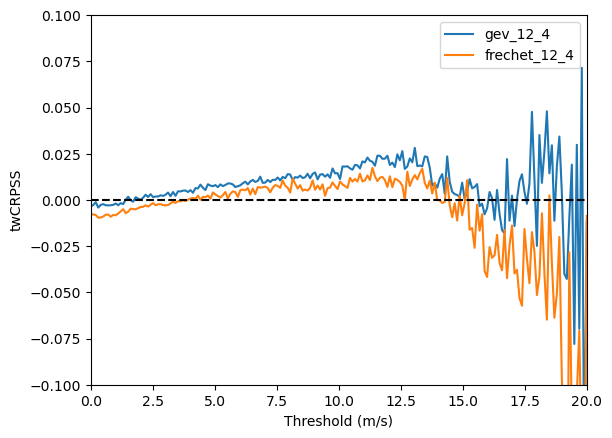

In [14]:
make_twcrpss_plot(tn_12_4, models, X_test, y_test, variances_test, x_values, ylim=ylim)

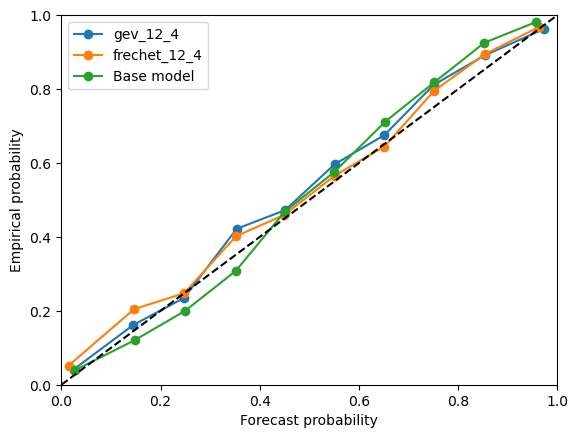

In [19]:
t=5
make_reliability_diagram(models, X_test, y_test, variances_test, t=t, base_model=tn_12_4)